In [1]:
%matplotlib notebook

import random
import time
import sys
import numpy as np
from matplotlib.pyplot import *

In [2]:
def init():
    global count, xs, ys, a, b, learning_rate
    # input data
    count = 100
    max_dist = 20
    xs = np.linspace(0, 100, count)
    ys = xs + np.random.normal(size=count) * max_dist
    # linear approximation coefficients
    a = random.randint(0, 2)
    b = random.randint(0, 2)
    # hyperparameters
    learning_rate = 0.000001

In [3]:
def error():
    return 0.5 / count * sum(((a * x + b) - ys[i]) ** 2 for i, x in enumerate(xs));

In [4]:
def gradient_descent_step():
    global a, b
    new_a = a - learning_rate * 1 / count * sum(((a * x + b) - ys[i]) for i, x in enumerate(xs))
    new_b = b - learning_rate * 1 / count * sum(((a * x + b) - ys[i]) * x for i, x in enumerate(xs))
    a, b = new_a, new_b

<IPython.core.display.Javascript object>


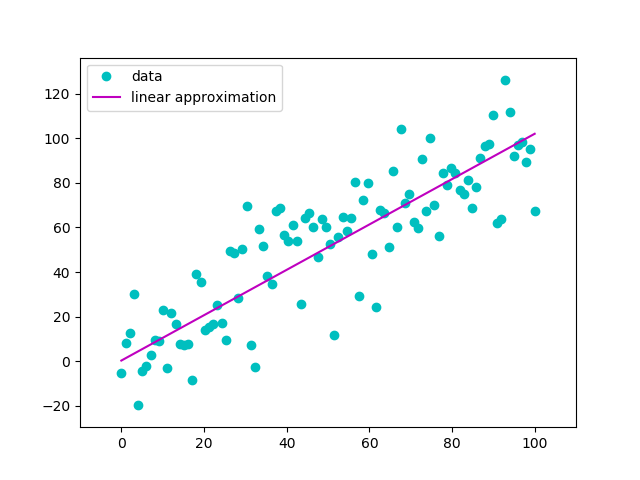

In [5]:
axes = subplot(111)
margin = 10

def draw():
    axes.clear()
    axes.set_xlim([min(xs) - margin, max(xs) + margin])
    axes.set_ylim([min(ys) - margin, max(ys) + margin])
    axes.plot(xs, ys, 'oc', label='data')
    axes.plot(xs, a * xs + b, '-m', label='linear approximation')
    legend()

In [6]:
# run this cell multiple times to check 

init()
previous_err = sys.float_info.max

print("     epoch |    a    |    b    | error")

for epoch in range(1000000):
    gradient_descent_step()
    err = error()
    print("%10d | %+7.2f | %+7.2f | %4.2f" % (epoch, a, b, err), end='\r')
    if err > previous_err:
        break
    previous_err = err

draw()

     epoch |    a    |    b    | error
